<img src="https://pa-legg.github.io/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics 23-24

## Portfolio Assignment: Worksheet 2

## Conduct an investigation on a URL database to develop a DGA classification system using machine learning techniques
---

For this task, the company **"UWEtech"** enlist your help once more. They have identified a number of suspicious URLs on their logging systems, suspecting that these URLs contain various malware, and so require your expertise to investigate these further. Specifically, they seek a machine learning approach to identify the malware families as observed on their network.

You will need to develop a machine learning tool using Python and scikit-learn that can identify URLs based on [Domain Generator Algorithms (DGA)](https://blog.malwarebytes.com/security-world/2016/12/explained-domain-generating-algorithm/), widely used by command and control malware to avoid static IP blocking.

You need to demonstrate experimental design of appropriate feature engineering to characterise the data, that will be used to inform your machine learning classifiers. You should show **at least two** schemes of curating appropriate features, based on the raw data as provided, and show this impacts the performance of your classifier.

You are also expected to utilise **3 different classifiers** using the scikit-learn library, and show how the model parameters can impact the performance of the classifiers. It is suggested that you use a Logistic Regression, a Random Forest Classifier, and a Multi-Layer Perceptron Classifier.

Finally, you should investigate the **performance and explainability** of your classifiers. It is recommended that you use the confusion matrix approach along with performance metrics, to assess how your model performs as well as when and why misclassification may occur. In reporting your findings, you should explain and reflect on this to understand which malware families are more separable, and which are more challenging to classify, using this approach. It is expected that a good performing classifier will achieve over 90% accuracy - however you will be assessed on your experimental design in finding a suitable classifier to achieve this.

**Dataset**: Please see the folder ***"Portfolio Assignment"*** under the Assignment tab on Blackboard for further detail related to the access and download of the necessary dataset.

**Hint**: You should conduct research using the [scikit-learn documentation and API reference](https://scikit-learn.org/stable/user_guide.html), making full use of the sample code that has been provided for your to help guide your research. You should also research Shapley Additive Explanations, and utilise the [online documentation](https://shap.readthedocs.io/en/latest/index.html). You should also think about a suitable means of generating input features for your classifier that capture sequential properties of text data.

### Assessment and Marking
---
The completion of this worksheet is worth **35%** of your portfolio assignment for the UFCFFY-15-M Cyber Security Analytics (CSA) module.

This is an **unguided** task that will be graded against the following core criteria:

* **A clear and iterative experimental approach for developing and refining the classifier to improve performance (10 Marks)**
  * *For the higher mark band, it would be expected that you would show an initial experimental design, and then refine this through improving the feature engineering stage, subsequently improving the model performance.*
* **Suitable feature engineering stages demonstrating at least two different methods and their performance (10 Marks)**
  * *For the higher mark band, it would be expected that you would demonstrate two sensible approaches for curating features, with strong justification as to why they would characterise the data fairly.*
* **Suitable use of the sci-kit machine learning library (5 Marks)**
  * *For the higher mark band, it would be expected that you would show a good comprehension of the library usage.*
* **Clear evaluation of ML performance and explainability (5 Marks)**
  * *For the higher mark band, it would be expected that you would use confusion matrices to explain which malware classes are more separable, and which share similarity according to a well-trained model.*
* **Clarity and presentation (5 Marks)**
  * *For the higher mark band, it would be expected that your notebook is clear and concise, with good use of Markdown to annotate your work professionally.*

### Submission Documents
---

Your submission for this task should include:

- **1 Jupyter Notebook file (*.ipynb)**

You should complete your work using the ipynb file provided (i.e., this document). Once you have completed your work, you should ensure that all code cells have been executed and then you should save your notebook. **Please note: Staff will NOT execute your notebook during marking. It is your responsibility to ensure that your saved notebook shows the code cell outputs as required.**

The deadline for your portfolio submission is **THURSDAY 2ND MAY @ 14:00**. This assignment is eligible for the [48-hour late submission window](https://www.uwe.ac.uk/study/academic-information/personal-circumstances/late-submission-window), however module staff will not be able to assist with any queries after the deadline.

Your portfolio submitted to Blackboard must contain 3 independent documents:

- ***STUDENT_ID-TASK1.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK2.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK3.pdf*** (a PDF report of your research investigation)

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You should use the [online Q&A form](https://forms.office.com/e/yxFJZDraRG) to ask questions related to this module and this assignment, as well as utilising the on-site teaching sessions.

---

# Student ID: 23008852

- **By submitting this assignment to Blackboard as part of your portfolio, I declare that the submission is my own work.**

***

# Catalog
### 1 Get the data ready
- 1.1 Import data
- 1.2 Pre-processing the data
- 1.3 Use seaborn `countplot` to view the data visual easily
- 1.4 Useful function for calculating the length of URLs
- 1.5 Create train/test data
- 1.6 Convert string into float

### 2 Random Forest Classifier
- 2.1 Create train/test data for Random Forest Classifier
- 2.2 Create the model instance
- 2.3 Fit the model to the training data
- 2.4 Make a prediction
- 2.5 Score the model
- 2.6 Classification Report
- 2.7 Confusion Report
- 2.8 Sceond Try

### 3 Logistic Regression
- Firsty try (By using dummies)
- Second Try (By converting Categorical Type into Float Type)

### 4 Multi-Layer Perceptron Classifier
- First Try (By using CountVectorizer)
- Second Try (By converting Categorical Type into Float Type)

### Pre-install useful packages

In [1]:
!pip3 install colorama  tldextract whois pyopenssl  catboost tldextract tld category-encoders wordcloud

### Import useful libraries

In [2]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
import seaborn as sns
# Preparation for Logistic Regression

import os
import gc
import datetime
from numba import njit
from abc import abstractmethod, ABCMeta
from sklearn.kernel_approximation import Nystroem
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
# from cuml import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.inspection import DecisionBoundaryDisplay
from tqdm.notebook import tqdm
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Parsing Urls
import re
from urllib.parse import urlparse
import os.path
import string
import logging

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Default settings of CSA Assessment 2
from collections import Counter
from timeit import timeit
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, Perceptron
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from tldextract import extract as tld_extract
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError

from colorama import Fore
from datetime import datetime
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from wordcloud import WordCloud
from gensim.models import Word2Vec
import tldextract
import hashlib
import whois
import warnings
from urllib.parse import urlparse

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', 24)  # None means unlimited rows
pd.set_option('display.max_columns', 24)  # None means unlimited columns

# 1 Get the data ready

### 1.1 Import dataset
- Import data as `data`
- Duplicate `data` as `df`. It's useful to have preserved original data, in case something wrong during the process.

In [5]:
data = pd.read_csv('./dga-24000.csv')

### Data shape
- As `data.shape` shows below, initial data has 2 columns and 24,000 rows.

In [6]:
data.shape

(24000, 2)

- There are two types of data "Domain" and "Family"
- I will extract features for building models.

In [7]:
data

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign
...,...,...
23995,fhyibfwhpahb.su,locky
23996,nlgusntqeqixnqyo.org,locky
23997,awwduqqrjxttmn.su,locky
23998,ccxmwif.pl,locky


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Domain  24000 non-null  object
 1   Family  24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB


# Caculate the numbers of each family
- The data has "24" different types of Family
- Each Family has 1,000 members.

In [9]:
# Count the numbers
def factor_coll(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)

fam = pd.DataFrame(factor_coll(data['Family']))
fam.T

,banjori,benign,emotet,flubot,gameover,locky,murofet,mydoom,necro,necurs,ngioweb,pykspa_v1,qadars,qakbot,ramnit,ranbyus,rovnix,shifu,shiotob,simda,suppobox,symmi,tinba,virut
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


### Turn Categorical data into numerical data with `LabelEncoder`
- New column "label" is the numerical data converted from "Family"

In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["label"] = lb_make.fit_transform(data["Family"])
label_fam = pd.DataFrame(factor_coll(data["label"]))
label_fam.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


- It's clear that new column "label" is numerical data
- "label" is the target variable (also called y or labels) and the rest of the other columns are the independent variables (also called data or X).

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Domain  24000 non-null  object
 1   Family  24000 non-null  object
 2   label   24000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 562.6+ KB


### A lookup table of "label" and "Family".

In [12]:
xtab = pd.crosstab(data['Family'], data['label'])
xtab

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Family,,,,,,,,,,,,,,,,,,,,,,,,
banjori,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
benign,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
emotet,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
flubot,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gameover,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
locky,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
murofet,0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mydoom,0,0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
necro,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Use seaborn countplot to view the data visual easily
- From the figure below, we can see each family euqally has 1000 members.

<Axes: xlabel='label', ylabel='count'>

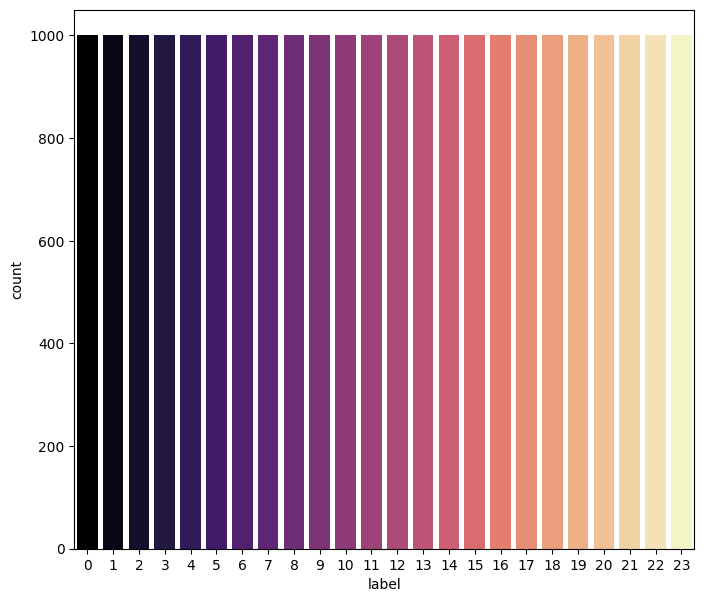

In [13]:
# countplot/barchart
plt.figure(figsize=(8,7))
sns.countplot(x='label', data=data, hue='label', palette='magma', legend=False)

### Useful function for calculating the length of URLs
- After calculating the length of URLs, add a new column `url_length` and `fam_len` to the end of `data`
- `url_length` is the length of "Domain"
- `fam_len` is the length of "Family"

In [14]:
def url_length(url):
    return len(str(url))

data['url_length'] = data['Domain'].apply(lambda i: url_length(i))
data['fam_len'] = data['Family'].apply(lambda i: url_length(i))
data

,Domain,Family,label,url_length,fam_len
0,google.com,benign,1,10,6
1,facebook.com,benign,1,12,6
2,youtube.com,benign,1,11,6
3,twitter.com,benign,1,11,6
4,instagram.com,benign,1,13,6
...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,5
23996,nlgusntqeqixnqyo.org,locky,5,20,5
23997,awwduqqrjxttmn.su,locky,5,17,5
23998,ccxmwif.pl,locky,5,10,5


### 1.6 Convert categorical type into float
- Due to `Domain` & `Family` are all string types, hence they will be converted into float types.

In [15]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create X (all columns except target)
X = data.drop("label", axis=1)
# Create y (only the target column)
y = data["label"]

# 2. Define the categorical features to transform
categorical_features = ["Domain", "Family", "url_length", "fam_len"]
# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged)

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(X)
transformed_X

<24000x24074 sparse matrix of type '<class 'numpy.float64'>'
	with 96000 stored elements in Compressed Sparse Row format>

**Now the data are ready for the classifiers**

# 2 Random Forest Classifier

# 1️⃣ First Try

### Create train/test data for Random Forest Classifier
- Create `X` (features matrix) &  `y` (labels)

In [16]:
np.random.seed(42)
# Split into X & y and train/test


# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [17]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19200, 24074), (4800, 24074), (19200,), (4800,))

# Create the model instance
- Now I've got a `Random Forest Classifier` instance, I will fit it into the training data.

- Once it's fit, I'll make predictions on the test data.

### Parameters in `Random Forest classifier`
The best hyperparameters I've tested so far.
- `n_estimators = 200` indicates the number of trees in the forest.
- `max_depth = 5` is the maximum depth of the tree.
- `n_jobs = -1` means using all processors.

In [18]:
# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=-1)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Fit the model to the training data

In [19]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

 ### Make a prediction
 - Use the fitted model to make predictions on the test data and save the predictions to a variable called y_preds

In [20]:
y_preds = clf.predict(X_test)
y_preds

array([22, 21, 13, ..., 22, 16,  9])

###  Evaluating a model's predictions
- Evaluate the model on the training data and test data
- Check how the model did by calling the score() method on it and passing it the training (X_train, y_train) and testing data.

In [21]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

0.9808854166666666

In [22]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test, y_test)

0.9785416666666666

### Confusion Report
- Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
- [Confusion Matrix for Multiple Classes](https://www.v7labs.com/blog/confusion-matrix-guide)

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_preds)

print("Accuracy:", accuracy)

Accuracy: 0.9785416666666666


In [24]:
from sklearn.metrics import multilabel_confusion_matrix
# View confusion matrix for test data and predictions
multilabel_confusion_matrix(y_test,  y_preds)

array([[[4625,    0],
        [   0,  175]],

       [[4610,    0],
        [   3,  187]],

       [[4587,   20],
        [   0,  193]],

       [[4592,    0],
        [   0,  208]],

       [[4589,    0],
        [   0,  211]],

       [[4586,    0],
        [ 100,  114]],

       [[4593,    0],
        [   0,  207]],

       [[4599,    0],
        [   0,  201]],

       [[4587,   15],
        [   0,  198]],

       [[4601,    0],
        [   0,  199]],

       [[4598,    0],
        [   0,  202]],

       [[4596,    0],
        [   0,  204]],

       [[4587,   20],
        [   0,  193]],

       [[4601,    0],
        [   0,  199]],

       [[4623,    0],
        [   0,  177]],

       [[4614,    0],
        [   0,  186]],

       [[4584,    0],
        [   0,  216]],

       [[4598,    0],
        [   0,  202]],

       [[4603,    0],
        [   0,  197]],

       [[4587,   19],
        [   0,  194]],

       [[4595,    0],
        [   0,  205]],

       [[4598,    2],
        [   

# Classification Report
> - `Precision` - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- `Recall` - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- `F1 score` - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
Support - The number of samples each metric was calculated on.
Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- `Macro avg` - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
- `Weighted avg` - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

# Summary
- The class `5` has the lowest `recall`(0.53) which means the actual positives in class `5` were incorrectly classified.
- The class `5` also has the lowest `f1-score`(0.7) which means the accuracy of classifying the class `5` can be improved.

In [25]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      0.98      0.99       190
           2       0.91      1.00      0.95       193
           3       1.00      1.00      1.00       208
           4       1.00      1.00      1.00       211
           5       1.00      0.53      0.70       214
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       201
           8       0.93      1.00      0.96       198
           9       1.00      1.00      1.00       199
          10       1.00      1.00      1.00       202
          11       1.00      1.00      1.00       204
          12       0.91      1.00      0.95       193
          13       1.00      1.00      1.00       199
          14       1.00      1.00      1.00       177
          15       1.00      1.00      1.00       186
          16       1.00      1.00      1.00       216
          17       1.00    

# Visualize Confusion Matrix
> The confusion matrix obtained by training a classifier and evaluating the trained model on this test set is shown above.
- Let that matrix be called `M`
- Each element in the matrix be denoted by `M_i_j`
- `i` is the row number (predicted class)
- `j` is the column number (expected class)
- For example, `M_1_2` = 0.016, `M_5_23` = 0.047.

# Summary
- Overall Accuracy is 0.98
- The class `5` has lowest scores on `recall`(0.53) and `f1-score`(0.7)
- To improve performance of the model, one should focus on the predictive results in class `5`

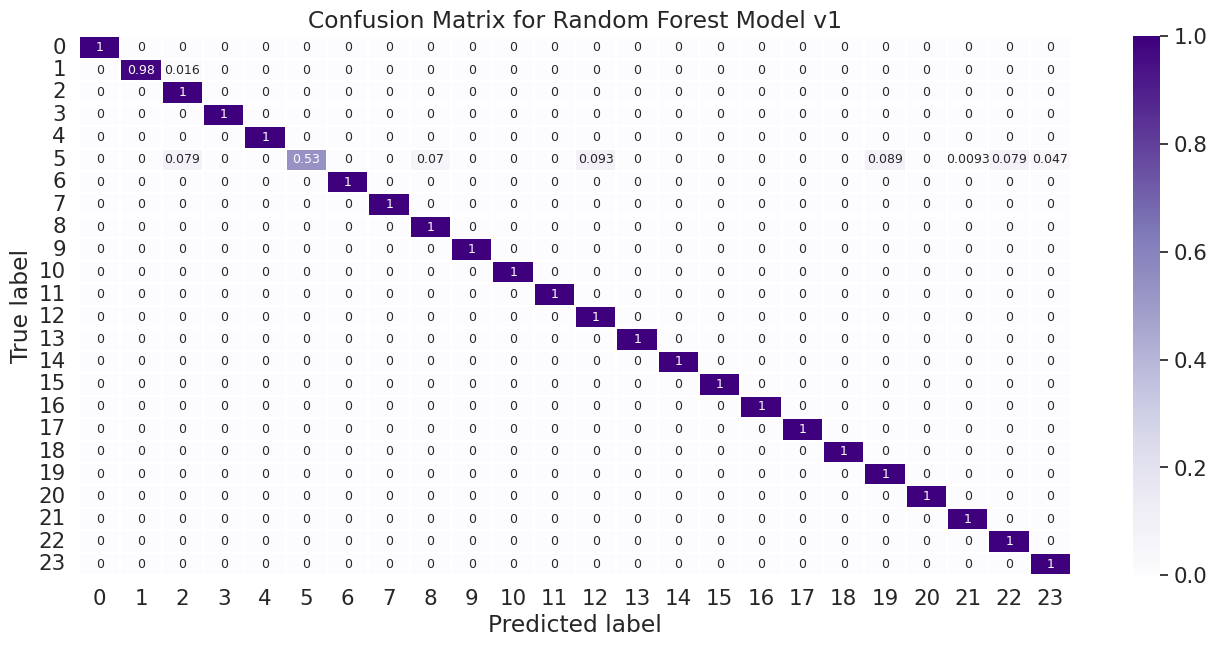

In [26]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_preds)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size': 9},
            cmap=plt.cm.Purples, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model v1')
plt.show()

# Summary

### The first try of Random Forest Classifier
- Generally, most of the classes learned well.
- In class `1` (`benign` Family), there is a lowest score
- In class `5` (`gameover` Family) has second lowest score 0.047 (M_5_23).
- Basically, class `5` performs unwell, meanwhile, class `1` only has one weakest score.


---

# 2️⃣ Second Try - Random Forest Classifier

In [132]:
# Make a duplicate of dataset
df = data.copy()
df

,Domain,Family,label,url_length,fam_len
0,google.com,benign,1,10,6
1,facebook.com,benign,1,12,6
2,youtube.com,benign,1,11,6
3,twitter.com,benign,1,11,6
4,instagram.com,benign,1,13,6
...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,5
23996,nlgusntqeqixnqyo.org,locky,5,20,5
23997,awwduqqrjxttmn.su,locky,5,17,5
23998,ccxmwif.pl,locky,5,10,5




# Useful Functions
- `extract_root_domain` can extract root domain name from Domain
- `extract_tld` can extract domain name from Domain

In [133]:
def extract_root_domain(url):
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain

In [134]:
def extract_tld(url):
    tld = url.split(".")[-1]
    return "." + tld

In [135]:
def url_length(url):
    return len(str(url))

# Feature Engineering

# Create a new column root_domain
There are 24,000 different root domain names, so I didn't plot this column.

In [136]:
df['root_domain'] = df['Domain'].apply(lambda x: extract_root_domain(str(x)))
df['root_domain']

0                  google
1                facebook
2                 youtube
3                 twitter
4               instagram
               ...       
23995        fhyibfwhpahb
23996    nlgusntqeqixnqyo
23997      awwduqqrjxttmn
23998             ccxmwif
23999    yhrryqjimvgfbqrv
Name: root_domain, Length: 24000, dtype: object

In [137]:
df['roo_len'] = df['root_domain'].apply(lambda i: url_length(i))
df

,Domain,Family,label,url_length,fam_len,root_domain,roo_len
0,google.com,benign,1,10,6,google,6
1,facebook.com,benign,1,12,6,facebook,8
2,youtube.com,benign,1,11,6,youtube,7
3,twitter.com,benign,1,11,6,twitter,7
4,instagram.com,benign,1,13,6,instagram,9
...,...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,5,fhyibfwhpahb,12
23996,nlgusntqeqixnqyo.org,locky,5,20,5,nlgusntqeqixnqyo,16
23997,awwduqqrjxttmn.su,locky,5,17,5,awwduqqrjxttmn,14
23998,ccxmwif.pl,locky,5,10,5,ccxmwif,7


### `root_domain`
- From the column of `root_domain`, the TOP 3 are listed below:
- `ddns` has the highest number (1,000)
- The second is `google` (30)
-The third is `bit` (24)

In [138]:
df['root_domain'].value_counts()

root_domain
ddns                            1000
google                            30
bit                               24
                                  21
blogspot                           8
                                ... 
1o8np5mmbhmsc1egn3hp1sa325m        1
13vr3tn1d79vs01vywhwb1jetnfb       1
1llpl3924byb1wf5gqu1icylm1         1
11ba1jsx75fn1d6b8w412nxn5p         1
1943a6c1rw2mxp16h0ee4174ngpr       1
Name: count, Length: 21452, dtype: int64

In [139]:
df['domain_name'] = df['Domain'].apply(extract_tld)

In [140]:
df['dom_len'] = df['domain_name'].apply(lambda i: url_length(i))
df

,Domain,Family,label,url_length,fam_len,root_domain,roo_len,domain_name,dom_len
0,google.com,benign,1,10,6,google,6,.com,4
1,facebook.com,benign,1,12,6,facebook,8,.com,4
2,youtube.com,benign,1,11,6,youtube,7,.com,4
3,twitter.com,benign,1,11,6,twitter,7,.com,4
4,instagram.com,benign,1,13,6,instagram,9,.com,4
...,...,...,...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,5,fhyibfwhpahb,12,.su,3
23996,nlgusntqeqixnqyo.org,locky,5,20,5,nlgusntqeqixnqyo,16,.org,4
23997,awwduqqrjxttmn.su,locky,5,17,5,awwduqqrjxttmn,14,.su,3
23998,ccxmwif.pl,locky,5,10,5,ccxmwif,7,.pl,3


In [141]:
df['domain_name'].value_counts()

domain_name
.com     6276
.net     4332
.eu      2035
.info    2000
.org     1732
         ... 
.ee         1
.mp         1
.page       1
.gle        1
.site       1
Name: count, Length: 92, dtype: int64

In [142]:
# View the summary of `df`
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Domain       24000 non-null  object
 1   Family       24000 non-null  object
 2   label        24000 non-null  int64 
 3   url_length   24000 non-null  int64 
 4   fam_len      24000 non-null  int64 
 5   root_domain  24000 non-null  object
 6   roo_len      24000 non-null  int64 
 7   domain_name  24000 non-null  object
 8   dom_len      24000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.6+ MB


In [143]:
df

,Domain,Family,label,url_length,fam_len,root_domain,roo_len,domain_name,dom_len
0,google.com,benign,1,10,6,google,6,.com,4
1,facebook.com,benign,1,12,6,facebook,8,.com,4
2,youtube.com,benign,1,11,6,youtube,7,.com,4
3,twitter.com,benign,1,11,6,twitter,7,.com,4
4,instagram.com,benign,1,13,6,instagram,9,.com,4
...,...,...,...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,5,fhyibfwhpahb,12,.su,3
23996,nlgusntqeqixnqyo.org,locky,5,20,5,nlgusntqeqixnqyo,16,.org,4
23997,awwduqqrjxttmn.su,locky,5,17,5,awwduqqrjxttmn,14,.su,3
23998,ccxmwif.pl,locky,5,10,5,ccxmwif,7,.pl,3


# Split data into separate training and test set

In [39]:
# Split into X & y and train/test
X = df.drop("label", axis=1)
y = df["label"]

In [40]:
X_train

<19200x24074 sparse matrix of type '<class 'numpy.float64'>'
	with 76800 stored elements in Compressed Sparse Row format>

# Convert Categorical Data into Float Data

In [41]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Domain", "Family", "url_length", "fam_len", "root_domain","roo_len", "domain_name","dom_len"]
# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged)

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(X)
transformed_X

<24000x45668 sparse matrix of type '<class 'numpy.float64'>'
	with 192000 stored elements in Compressed Sparse Row format>

# Create train and test splits with transformed_X

In [42]:
np.random.seed(42)

# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [43]:
# Create the model instance
clf = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=-1)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Fit the model on the numerical data

In [44]:
# Fit the model on the numerical data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

# Make a Prediction

In [45]:
y_preds = clf.predict(X_test)
y_preds

array([22, 21, 13, ..., 22, 16,  9])

# Score
- The score of `trained data` is improved slightly (+0.002)
- The score of `tested data` is imrpove more than trained data (+0.006)

In [46]:
clf.score(X_train, y_train)

0.9827604166666667

In [47]:
clf.score(X_test, y_test)

0.9845833333333334

# Classification Report
- Compared with the classification report of Random Forest first try, second try clssification report has been improved.
- The class `5` has been significantly improved.
- The score of `recall` is 0.98 (+0.45).
- The score of `f1-score` is 0.99 (+0.29).
- The overall `accuracy` is still 0.98, but `macro avg` is improved to 0.99 (+0.01), as well as weighted avg 0.99 (+0.01).

In [48]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       0.99      0.86      0.92       190
           2       0.99      1.00      1.00       193
           3       1.00      1.00      1.00       208
           4       0.90      1.00      0.95       211
           5       1.00      0.98      0.99       214
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       201
           8       1.00      1.00      1.00       198
           9       1.00      0.97      0.99       199
          10       1.00      0.95      0.97       202
          11       1.00      1.00      1.00       204
          12       0.96      1.00      0.98       193
          13       1.00      0.85      0.92       199
          14       0.98      1.00      0.99       177
          15       0.99      1.00      1.00       186
          16       0.96      1.00      0.98       216
          17       0.92    

# Confusion Matrix

In [49]:
from sklearn.metrics import multilabel_confusion_matrix
# View confusion matrix for test data and predictions
multilabel_confusion_matrix(y_test, y_preds)

array([[[4625,    0],
        [   0,  175]],

       [[4609,    1],
        [  26,  164]],

       [[4606,    1],
        [   0,  193]],

       [[4591,    1],
        [   0,  208]],

       [[4565,   24],
        [   0,  211]],

       [[4586,    0],
        [   4,  210]],

       [[4593,    0],
        [   0,  207]],

       [[4599,    0],
        [   0,  201]],

       [[4602,    0],
        [   0,  198]],

       [[4601,    0],
        [   5,  194]],

       [[4598,    0],
        [  10,  192]],

       [[4596,    0],
        [   0,  204]],

       [[4600,    7],
        [   0,  193]],

       [[4601,    0],
        [  29,  170]],

       [[4620,    3],
        [   0,  177]],

       [[4613,    1],
        [   0,  186]],

       [[4576,    8],
        [   0,  216]],

       [[4581,   17],
        [   0,  202]],

       [[4603,    0],
        [   0,  197]],

       [[4605,    1],
        [   0,  194]],

       [[4595,    0],
        [   0,  205]],

       [[4600,    0],
        [   

# Visualize multi-class Confusion Matrix
- Class `5` has been improved, but still has some weak scores (i.e., `M_5_1` and `M_5_3`).
- Classes `1`,`9`, `10` and `13` also have lower scores with higher rates of misclassification.
- Class `13` has a lowest score of 0.85 (-0.15).

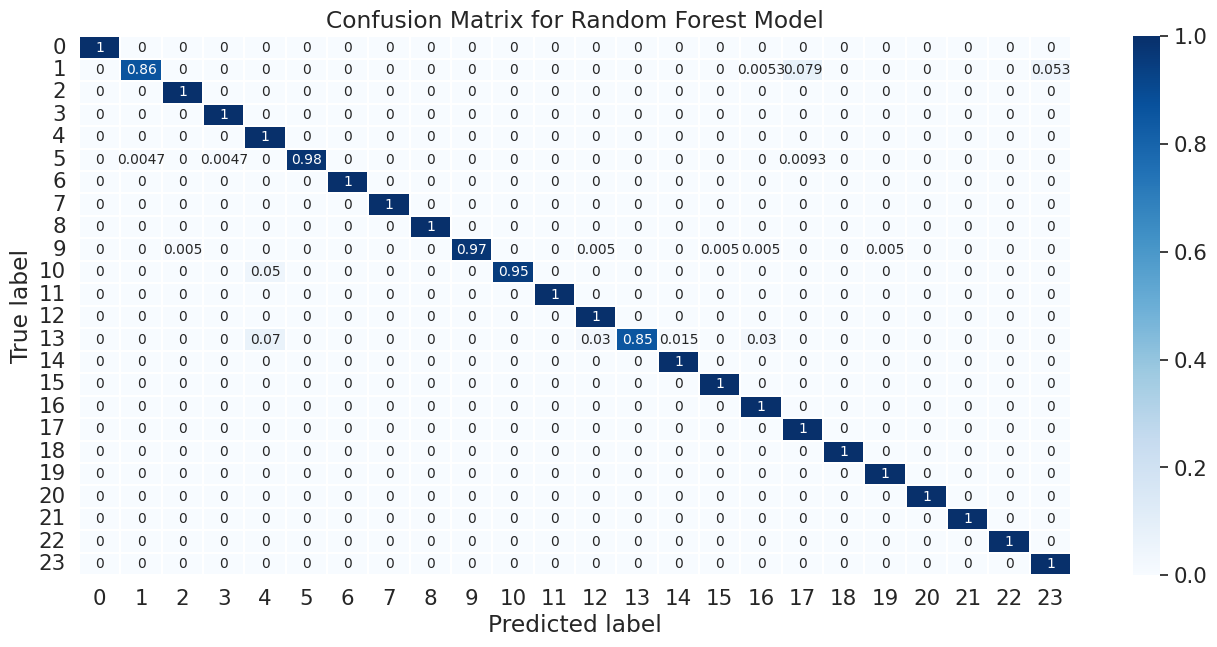

In [50]:
# Get and reshape confusion matrix data
matrixx = confusion_matrix(y_test, y_preds)
matrixx = matrixx.astype('float') / matrixx.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrixx, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 3️⃣ Third Try - Random Forest Classifier

In [75]:
df

,Domain,Family,label,url_length,fam_len,root_domain,roo_len,domain_name,dom_len
0,google.com,benign,1,10,6,google,6,.com,4
1,facebook.com,benign,1,12,6,facebook,8,.com,4
2,youtube.com,benign,1,11,6,youtube,7,.com,4
3,twitter.com,benign,1,11,6,twitter,7,.com,4
4,instagram.com,benign,1,13,6,instagram,9,.com,4
...,...,...,...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,5,fhyibfwhpahb,12,.su,3
23996,nlgusntqeqixnqyo.org,locky,5,20,5,nlgusntqeqixnqyo,16,.org,4
23997,awwduqqrjxttmn.su,locky,5,17,5,awwduqqrjxttmn,14,.su,3
23998,ccxmwif.pl,locky,5,10,5,ccxmwif,7,.pl,3


In [76]:
# Count the numbers in a descendign order
def factor_coll(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=True)

In [77]:
roo_cal = pd.DataFrame(factor_coll(df['domain_name']))
roo_cal.T

,.com,.net,.eu,.info,.org,.biz,.xyz,.ru,.in,.cn,.cc,.su,...,.mp,.ph,.page,.gd,.google,.gle,.gl,.gg,.ee,.dev,.site,.at
count,6276,4332,2035,2000,1732,1292,1090,1041,651,557,294,259,...,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
# Compare `label` column with `roo_len` column
pd.crosstab(df.label, df.roo_len).T

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
roo_len,,,,,,,,,,,,,,,,,,,,,,,,
0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,112,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
# Compare `label` column with `dom_len` column
pd.crosstab(df.label, df.dom_len).T

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dom_len,,,,,,,,,,,,,,,,,,,,,,,,
3,0,160,1000,665,0,485,0,494,0,847,0,93,0,0,0,750,414,0,0,1000,173,0,451,0
4,1000,834,0,335,1000,264,803,407,1000,153,654,670,1000,837,1000,250,586,0,1000,0,827,1000,500,1000
5,0,4,0,0,0,172,197,99,0,0,346,237,0,163,0,0,0,1000,0,0,0,0,49,0
6,0,1,0,0,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# Split data into X and y
X = df.drop("label", axis=1)

y = df["label"]

In [81]:
X

,Domain,Family,url_length,fam_len,root_domain,roo_len,domain_name,dom_len
0,google.com,benign,10,6,google,6,.com,4
1,facebook.com,benign,12,6,facebook,8,.com,4
2,youtube.com,benign,11,6,youtube,7,.com,4
3,twitter.com,benign,11,6,twitter,7,.com,4
4,instagram.com,benign,13,6,instagram,9,.com,4
...,...,...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,15,5,fhyibfwhpahb,12,.su,3
23996,nlgusntqeqixnqyo.org,locky,20,5,nlgusntqeqixnqyo,16,.org,4
23997,awwduqqrjxttmn.su,locky,17,5,awwduqqrjxttmn,14,.su,3
23998,ccxmwif.pl,locky,10,5,ccxmwif,7,.pl,3


In [82]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23995    5
23996    5
23997    5
23998    5
23999    5
Name: label, Length: 24000, dtype: int64

# Convert Categorical data into numerical data

In [83]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create X (all columns except target)
X = data.drop("label", axis=1)
# Create y (only the target column)
y = data["label"]

# 2. Define the categorical features to transform
categorical_features = ["Domain", "Family", "url_length", "fam_len"]
# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged)

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_xxx = transformer.fit_transform(X)
transformed_xxx

<24000x24074 sparse matrix of type '<class 'numpy.float64'>'
	with 96000 stored elements in Compressed Sparse Row format>

In [84]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(transformed_xxx,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [86]:
X_train

<19200x24074 sparse matrix of type '<class 'numpy.float64'>'
	with 76800 stored elements in Compressed Sparse Row format>

In [73]:
y_train, len(y_train)

(3572     22
 16782    10
 20543    17
 12368     6
 19955     8
          ..
 21575    20
 5390     19
 860       1
 15795     2
 23654     5
 Name: label, Length: 19200, dtype: int64,
 19200)

# Enumeration for n_estimators
- I will iterate 150 to 200 to see the best result.

In [87]:
# Let's tune Random Forest Classifier

train_scores = []
test_scores = []

# Create a list of differnt values for trees
trees = range(150, 201)

# Create the Random Forest instance
clf = RandomForestClassifier(max_depth=5, n_jobs=-1)

# Loop through different trees
for i in trees:
    clf.set_params(n_estimators=i)

    # Fit the algorithm
    clf.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(clf.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(clf.score(X_test, y_test))

In [88]:
train_scores

[0.9696875,
 0.9901041666666667,
 0.9961458333333333,
 0.9943229166666666,
 0.9988020833333333,
 0.9964583333333333,
 0.98640625,
 0.96015625,
 0.99953125,
 0.9424479166666667,
 0.9958854166666666,
 0.9977083333333333,
 0.9598958333333333,
 0.990625,
 0.9963541666666667,
 0.99140625,
 0.97078125,
 0.9997916666666666,
 0.9731770833333333,
 0.9969791666666666,
 0.9990104166666667,
 0.95890625,
 1.0,
 0.9782291666666667,
 0.9913541666666666,
 0.99265625,
 1.0,
 0.9926041666666666,
 0.9708333333333333,
 0.9954166666666666,
 0.9915625,
 0.9998958333333333,
 0.9923958333333334,
 0.9897916666666666,
 0.9796875,
 0.99421875,
 1.0,
 0.99640625,
 0.9858854166666666,
 0.99796875,
 0.9828645833333334,
 0.9990104166666667,
 1.0,
 0.98671875,
 0.9902604166666666,
 0.97984375,
 0.9955208333333333,
 0.9905208333333333,
 0.99609375,
 0.9846354166666667,
 1.0]

In [90]:
test_scores

[0.965625,
 0.9920833333333333,
 0.9983333333333333,
 0.995625,
 0.9983333333333333,
 0.9975,
 0.984375,
 0.959375,
 0.9997916666666666,
 0.9383333333333334,
 0.9935416666666667,
 0.9975,
 0.953125,
 0.9945833333333334,
 0.9966666666666667,
 0.9925,
 0.971875,
 0.9997916666666666,
 0.975625,
 0.99625,
 0.99875,
 0.953125,
 1.0,
 0.976875,
 0.993125,
 0.9902083333333334,
 1.0,
 0.9933333333333333,
 0.973125,
 0.9952083333333334,
 0.9929166666666667,
 0.9995833333333334,
 0.9914583333333333,
 0.9920833333333333,
 0.9770833333333333,
 0.9933333333333333,
 1.0,
 0.9945833333333334,
 0.9891666666666666,
 0.9975,
 0.98125,
 0.99875,
 1.0,
 0.98875,
 0.9933333333333333,
 0.9766666666666667,
 0.9933333333333333,
 0.9939583333333334,
 0.9966666666666667,
 0.98375,
 1.0]

# Summary
- The best result occurs when n_estimator is `172`, `176`, `186`, `192` and `200` (1.0)
- `train_scores` and `test_scores` have similar performance.


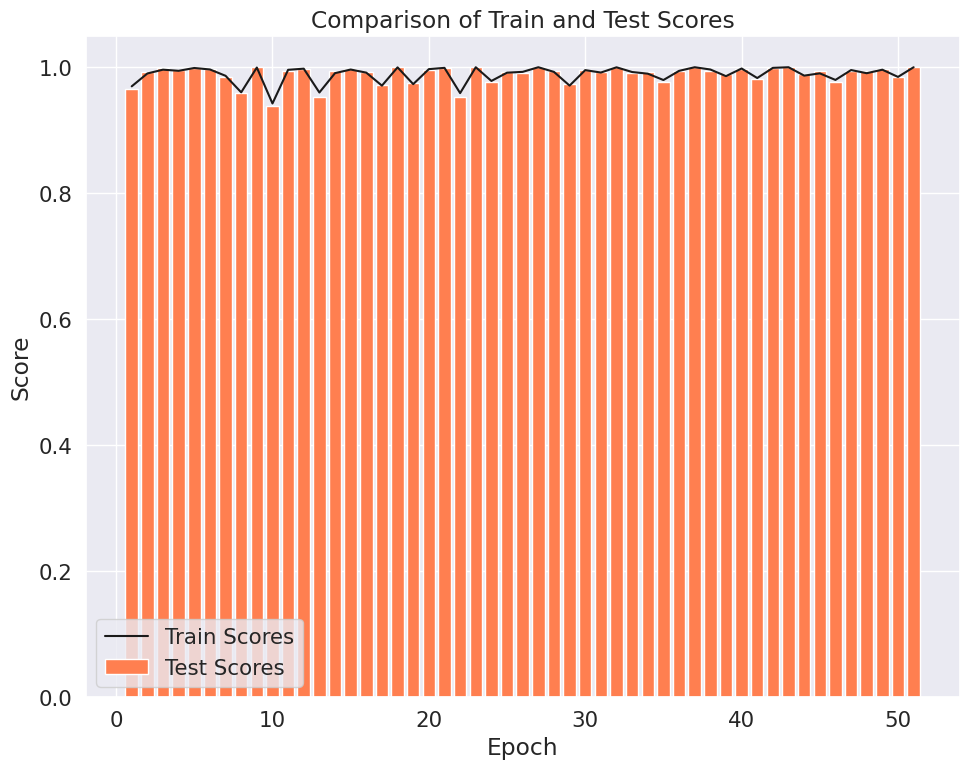

In [110]:
# Create index for both lists
index = range(1, len(train_scores) + 1)

# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plotting the line chart on the first subplot
ax1.plot(index, train_scores, label='Train Scores', color='k')
ax1.bar(index, test_scores, label='Test Scores', color='coral')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Score')
ax1.set_title('Comparison of Train and Test Scores')
ax1.legend()


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Tune the random hyperparameter search

In [111]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [112]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [115]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Training R^2": model.score(X_train, y_train),
              }
    return scores

In [113]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [114]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

1.0

# ⭐ Final try with the best parameters


In [121]:
np.random.seed(42)
# Split into X & y and train/test


# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_xxx,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [122]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19200, 24074), (4800, 24074), (19200,), (4800,))

In [123]:
# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier(n_estimators=910,
                              min_samples_split=18,
                              min_samples_leaf = 1,
                              max_depth = 10)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 910,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=18, n_estimators=910)

In [125]:
y_preds = clf.predict(X_test)
y_preds

array([22, 21, 13, ..., 22, 16,  9])

In [126]:
clf.score(X_train, y_train)

1.0

In [127]:
clf.score(X_test, y_test)

1.0

In [128]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       193
           3       1.00      1.00      1.00       208
           4       1.00      1.00      1.00       211
           5       1.00      1.00      1.00       214
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       201
           8       1.00      1.00      1.00       198
           9       1.00      1.00      1.00       199
          10       1.00      1.00      1.00       202
          11       1.00      1.00      1.00       204
          12       1.00      1.00      1.00       193
          13       1.00      1.00      1.00       199
          14       1.00      1.00      1.00       177
          15       1.00      1.00      1.00       186
          16       1.00      1.00      1.00       216
          17       1.00    

In [129]:
# View confusion matrix for test data and predictions
multilabel_confusion_matrix(y_test,  y_preds)

array([[[4625,    0],
        [   0,  175]],

       [[4610,    0],
        [   0,  190]],

       [[4607,    0],
        [   0,  193]],

       [[4592,    0],
        [   0,  208]],

       [[4589,    0],
        [   0,  211]],

       [[4586,    0],
        [   0,  214]],

       [[4593,    0],
        [   0,  207]],

       [[4599,    0],
        [   0,  201]],

       [[4602,    0],
        [   0,  198]],

       [[4601,    0],
        [   0,  199]],

       [[4598,    0],
        [   0,  202]],

       [[4596,    0],
        [   0,  204]],

       [[4607,    0],
        [   0,  193]],

       [[4601,    0],
        [   0,  199]],

       [[4623,    0],
        [   0,  177]],

       [[4614,    0],
        [   0,  186]],

       [[4584,    0],
        [   0,  216]],

       [[4598,    0],
        [   0,  202]],

       [[4603,    0],
        [   0,  197]],

       [[4606,    0],
        [   0,  194]],

       [[4595,    0],
        [   0,  205]],

       [[4600,    0],
        [   

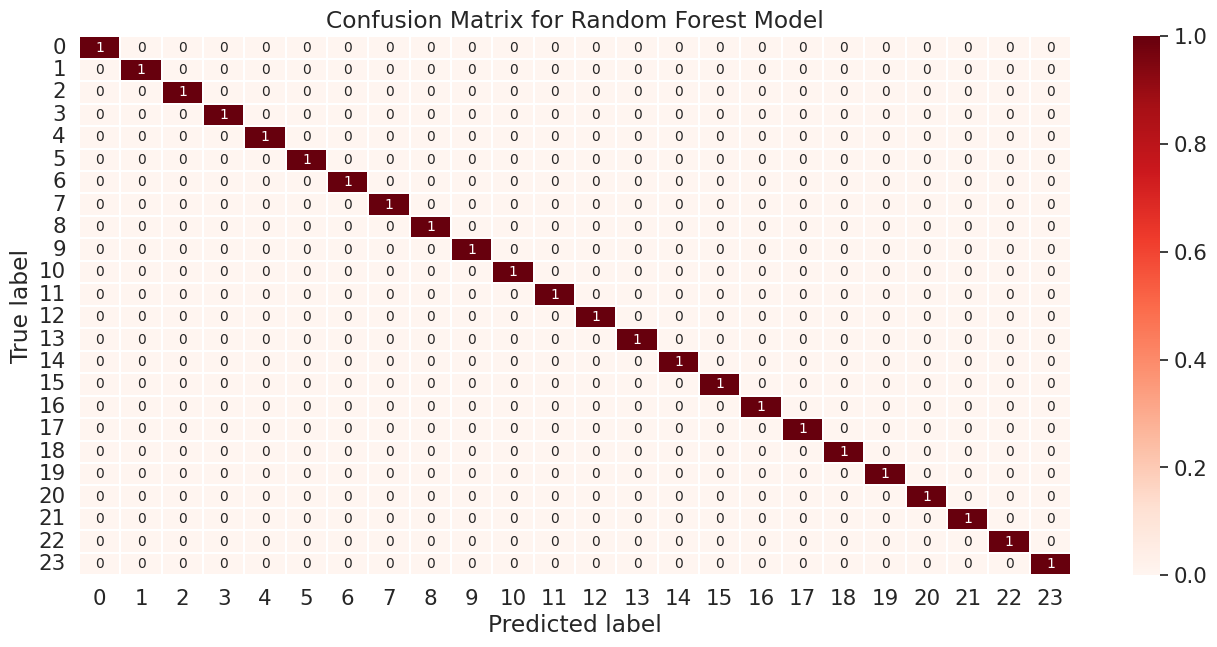

In [130]:
# Get and reshape confusion matrix data
matrixx = confusion_matrix(y_test, y_preds)
matrixx = matrixx.astype('float') / matrixx.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrixx, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Summary
- After using `RandomizedSearchCV` to find the best parameters for random forest classifier, the final try achieves overall 1.0.

---

# 3 Logistic Regression

# 1️⃣ First Try
Create train/test data for Logistic Regression Classifier

In [144]:
df

,Domain,Family,label,url_length,fam_len,root_domain,roo_len,domain_name,dom_len
0,google.com,benign,1,10,6,google,6,.com,4
1,facebook.com,benign,1,12,6,facebook,8,.com,4
2,youtube.com,benign,1,11,6,youtube,7,.com,4
3,twitter.com,benign,1,11,6,twitter,7,.com,4
4,instagram.com,benign,1,13,6,instagram,9,.com,4
...,...,...,...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,5,fhyibfwhpahb,12,.su,3
23996,nlgusntqeqixnqyo.org,locky,5,20,5,nlgusntqeqixnqyo,16,.org,4
23997,awwduqqrjxttmn.su,locky,5,17,5,awwduqqrjxttmn,14,.su,3
23998,ccxmwif.pl,locky,5,10,5,ccxmwif,7,.pl,3


In [145]:
df.shape

(24000, 9)

### view summary of dataset

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Domain       24000 non-null  object
 1   Family       24000 non-null  object
 2   label        24000 non-null  int64 
 3   url_length   24000 non-null  int64 
 4   fam_len      24000 non-null  int64 
 5   root_domain  24000 non-null  object
 6   roo_len      24000 non-null  int64 
 7   domain_name  24000 non-null  object
 8   dom_len      24000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.6+ MB


In [147]:
df.describe()

,label,url_length,fam_len,roo_len,dom_len
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,11.500000,18.249125,6.208333,13.861583,3.829083
std,6.922331,6.014745,1.079342,6.336075,0.592567
min,0.000000,4.000000,5.000000,0.000000,3.000000
25%,5.750000,14.000000,5.000000,10.000000,3.000000
50%,11.500000,18.000000,6.000000,13.000000,4.000000
75%,17.250000,20.000000,7.000000,16.000000,4.000000
max,23.000000,48.000000,9.000000,44.000000,7.000000


###  Check `Family` using bar chart

In [148]:
count = data['Family'].value_counts()
colors = [
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))
fig.show()

### Plot the `domain_name`
- `.com` has the hightest number
- `.net` has the second
- `.eu` is the thrid

In [149]:
count = df['domain_name'].value_counts()
colors = [
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))
fig.show()

### Check whether there is any missing values
- There is no missing value.

In [153]:
df.isnull().sum()

Domain         0
Family         0
label          0
url_length     0
fam_len        0
root_domain    0
roo_len        0
domain_name    0
dom_len        0
dtype: int64

#  Create the model instance


###  Split data into train and test

In [155]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['Domain', 'Family', 'root_domain', 'domain_name']


In [ ]:
# check labels in Family variable

df.Family.unique()

In [ ]:
# let's do One Hot Encoding of Family variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df.Family, drop_first=True).head()

In [ ]:
# check labels in Family variable

df.Domain.unique()

In [ ]:
# check frequency distribution of values in Domain variable

df.Domain.value_counts()

In [ ]:
# let's do One Hot Encoding of Domain variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df.Domain, drop_first=True).head()

In [ ]:
# check frequency distribution of values in Root_Domain variable
df.root_domain.unique()

In [ ]:
# check frequency distribution of values in Root_Domain variable

df.root_domain.value_counts()

In [ ]:
# let's do One Hot Encoding of root_domain variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df.root_domain, drop_first=True).head()

In [ ]:
# check frequency distribution of values in domain_name variable
df.domain_name.unique()

In [ ]:
# check frequency distribution of values in domain_name variable

df.domain_name.value_counts()

In [ ]:
# let's do One Hot Encoding of domain_name variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df.domain_name, drop_first=True, dummy_na=True).head()

In [ ]:
# check for missing values in categorical variables

df[categorical].isnull().sum()

# Check Numerical variables

In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

In [ ]:
# view the numerical variables
df[numerical].head()

In [ ]:
# check missing values in numerical variables

df[numerical].isnull().sum()

In [ ]:
# view summary statistics in numerical variables
print(round(df[numerical].describe()))

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='label')
fig.set_title('')
fig.set_ylabel('label')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='url_length')
fig.set_title('')
fig.set_ylabel('url_length')



plt.subplot(2, 2, 3)
fig = df.boxplot(column='dom_len')
fig.set_title('')
fig.set_ylabel('dom_len')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='roo_len')
fig.set_title('')
fig.set_ylabel('root_len')

The above boxplots confirm that there are lot of outliers in these variables

# Check the distribution of variables

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.label.hist(bins=10)
fig.set_xlabel('Data')
fig.set_ylabel('label')


plt.subplot(2, 2, 2)
fig = df.url_length.hist(bins=10)
fig.set_xlabel('Data')
fig.set_ylabel('url_len')


plt.subplot(2, 2, 3)
fig = df.roo_len.hist(bins=10)
fig.set_xlabel('Data')
fig.set_ylabel('Root Length')


plt.subplot(2, 2, 4)
fig = df.dom_len.hist(bins=10)
fig.set_xlabel('Data')
fig.set_ylabel('Domain Length')

# IQR
The interquartile range (IQR) is the box plot showing the middle 50% of scores and can be calculated by subtracting the lower quartile from the upper quartile (e.g., Q3−Q1).<br>

- [Simplypsychology - Boxplot explained](https://www.simplypsychology.org/boxplots.html)
- [Scribbr - Another Useful explanation about Interquartile Range (IQR)](https://www.scribbr.com/statistics/interquartile-range/)

In [ ]:
# find outliers for Rainfall variable

IQR = df.fam_len.quantile(0.75) - df.fam_len.quantile(0.25)
Lower_fence = df.fam_len.quantile(0.25) - (IQR * 3)
Upper_fence = df.fam_len.quantile(0.75) + (IQR * 3)
print('Family length outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [ ]:
# find outliers for url_length variable

IQR = df.url_length.quantile(0.75) - df.url_length.quantile(0.25)
Lower_fence = df.url_length.quantile(0.25) - (IQR * 3)
Upper_fence = df.url_length.quantile(0.75) + (IQR * 3)
print('url_length outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [ ]:
# find outliers for roo_len variable

IQR = df.roo_len.quantile(0.75) - df.roo_len.quantile(0.25)
Lower_fence = df.roo_len.quantile(0.25) - (IQR * 3)
Upper_fence = df.roo_len.quantile(0.75) + (IQR * 3)
print('roo_len  outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [ ]:
# find outliers for dom_len variable

IQR = df.dom_len.quantile(0.75) - df.dom_len.quantile(0.25)
Lower_fence = df.dom_len.quantile(0.25) - (IQR * 3)
Upper_fence = df.dom_len.quantile(0.75) + (IQR * 3)
print('dom_len outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#  Declare feature vector and target variable

In [ ]:
# Split into X & y and train/test
X = df.drop(columns=["url_length", "domain_name"], axis=1)
y = df.url_length

 # Split data into separate training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

In [ ]:
X_train.describe()

In [ ]:
X_train

# Feature Engineering

In [ ]:
# check data types in X_train

X_train.dtypes

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

In [ ]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

In [ ]:
X_train[numerical].describe()

In [ ]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

In [ ]:
X_test[numerical].describe()

In [ ]:
X_train.dom_len.max(), X_test.dom_len.max()

In [ ]:
X_train.roo_len.max(), X_test.roo_len.max()

In [ ]:
# encode Domain variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Domain'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['Domain_13', 'Domain_14']],
                     pd.get_dummies(X_train.Family)],
                     axis=1)

In [ ]:
X_train.head()

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['Domain_13', 'Domain_14']],
                     pd.get_dummies(X_test.Family)],
                     axis=1)

In [ ]:
X_test.head()

Noe there are training and testing set ready for model building.

# Feature Scaling
This will map all the feature variables onto the same scale.

In [ ]:
X_train.describe()

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Fit and transform on training data
X_train = scaler.fit_transform(X_train)

# Only transform on test data, using the parameters learned from training data
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

# Model training

In [ ]:

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

# Predict results

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

`predict_proba` method gives the probabilities for the target variable(0 and 1) in this case, in array form.

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

# Check accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Compare the train-set and test-set accuracy¶
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

# Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)


In [ ]:
print('Shape of y_test:', y_test.shape)
print('Shape of y_pred_test:', y_pred_test.shape)

In [ ]:
y_test = y_test.ravel()  # Reshape y_test to make it one-dimensional
y_pred_test = y_pred_test.ravel()  # Reshape y_pred_test to make it one-dimensional

# Second try - Logisitic Regression

In [ ]:
df

In [ ]:
# Split into X & y and train/test
X = df.drop("label", axis=1)
y = df.label


# 2️⃣ Second Try

### Convert Categorical type into float

In [ ]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Domain", "Family", "url_length", "root_domain", "domain_name"]
# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged)

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_xx = transformer.fit_transform(X)
transformed_xx

In [ ]:
trainX, testX, trainY, testY = train_test_split(transformed_xx, df.url_length, test_size=0.33, random_state=42)

# Fit the model to the training data

In [ ]:
# create lr object
lr = LogisticRegression(solver='liblinear', random_state=42)

In [ ]:
lr.get_params()

In [ ]:
lr.fit(trainX,trainY)

# Make a prediction

In [ ]:
y_pred1 = lr.predict(testX)
y_pred1

# Score the model

In [ ]:
lr.score(trainX,trainY)

In [ ]:
lr.fit(testX, testY)

In [ ]:
lr.score(testX, testY)

# Classification Report

In [ ]:
# View the classification report for test data and predictions
print(classification_report(testY, y_pred1))

# Confusion Matrix
Confusion matrix
The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [ ]:
cm1 = confusion_matrix(testY, y_pred1)
print(cm1)

In [ ]:
# Get and reshape confusion matrix data
matrix2 = confusion_matrix(testY, y_pred1)
matrix2 = matrix2.astype('float') / matrix2.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=0.4)
sns.heatmap(matrix2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 3️⃣ Third Try - Logistic Regression

# Hyperparameter tuning with RandomizedSearchCV
I will tune using RandomizedSearchCV for `LogisticRegression()`

In [ ]:
### Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

### Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

In [ ]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Training R^2": model.score(X_train, y_train),
              }
    return scores

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(X_test, y_test)

# Hyperparamter Tuning with GridSearchCV
Since the LogisticRegression model provides the best scores so far, I'll try and improve them again using GridSearchCV.

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [ ]:
# Check the best hyperparmaters
gs_log_reg.best_params_

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

# Evalute the tuned machine learning classifier, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_predictions(y_test, y_preds)
plt.show()

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

# 4 Multi-Layer Perceptron Classifier
# 4.1 First Try

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate

In [ ]:
data

In [ ]:
df

# Create train/test data for Multi-Layer Perceptron Classifier

In [ ]:
count_vectorizer = CountVectorizer()
peh_vectors = count_vectorizer.fit_transform(df["Domain"])

#  Create the model instance

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(peh_vectors, df["url_length"], shuffle = True, test_size=0.33, random_state=42)

# Fit the model to the training data

In [ ]:
mlp_peh = MLPClassifier(hidden_layer_sizes = (6,5), random_state = 3)

mlp_peh.fit(Xtrain, ytrain)

#  Make a prediction

In [ ]:
ypred = mlp_peh.predict(Xtest)
ypred

# Score the model

In [ ]:
mlp_peh.score(Xtrain, ytrain)

In [ ]:
mlp_peh.fit(Xtest, ytest)

In [ ]:
mlp_peh.score(Xtest, ytest)

# Accuracy

In [ ]:
accuracy_score(ytest, ypred)

# Classification Report

In [ ]:
# View the classification report for test data and predictions
print(classification_report(ytest, ypred))

# Confusion Matrix

In [ ]:
cm = confusion_matrix(ytest, ypred)
print(cm)

In [ ]:
# Get and reshape confusion matrix data
matri = confusion_matrix(ytest, ypred)
matri = matri.astype('float') / matri.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=0.8)
sns.heatmap(matri, annot=True, annot_kws={'size':5},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multi-Layer Perceptron Classifier ')
plt.show()

# 4.2 Second Try

In [ ]:
df

In [ ]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['url_length'])
y = df['url_length']

# Convert Categorical Type into Float Type

In [ ]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Domain", "Family", "url_length", "fam_len", "root_domain","roo_len", "domain_name", "dom_len"]
# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged)

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_xx = transformer.fit_transform(X)
transformed_xx

In [ ]:
# diving the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_xx, y, train_size=0.7, random_state=105)

x_train.shape, x_test.shape

In [ ]:
# building the model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(x.shape[1], x.shape[1], x.shape[1]), max_iter=500, random_state=105)

# training the model
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test,  y_pred)

In [ ]:
# Get and reshape confusion matrix data
matri = confusion_matrix(y_test,  y_pred)
matri = matri.astype('float') / matri.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=0.8)
sns.heatmap(matri, annot=True, annot_kws={'size':5},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multi-Layer Perceptron Classifier ')
plt.show()

# Classification Report

In [ ]:
# obtaining the classification report of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

- Accuracy: 100%, which means that the model performs well
- Precision: 100%, which means that 100% of the samples predicted to be positive were actually positive
- Recall: 100%, which means that 100% of the total positive samples were predicted to be positive
- F1 Score: 100%, which means that the model is very robust

In [ ]:
# obtaining the weights
model.coefs_

# Use the `intercepts_` attribute of the model to obtain the biases.

In [ ]:
# obtaining the biases
model.intercepts_